In [ ]:
#Série temporal de vendas
#Autor: Fernando Schmitt

In [20]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#criando conexão com o banco de dados
bd = psycopg2.connect(host='localhost', database='fernando', user='postgres', password='******', port=5432) 

In [5]:
#cursor de conexão com banco de dados
cur = bd.cursor()
consulta = 'select * from vendas'
cur.execute(consulta)
registro = cur.fetchall()


In [11]:
#carregando os dados em um dataframe pandas para melhor visualização
df = pd.DataFrame(registro, columns=['IdVenda', 'IdVendedor', 'CodCliente', 'Data', 'Total'])
df.head(50)

,IdVenda,IdVendedor,CodCliente,Data,Total
0,1,1,1,2016-01-01,8053.60
1,2,6,185,2016-01-01,150.40
2,3,7,31,2016-01-02,6087.00
3,4,5,1,2016-01-02,13828.60
4,5,8,120,2016-01-03,26096.66
5,6,9,74,2016-01-04,18402.00
6,7,9,191,2016-01-06,7524.20
7,8,6,2,2016-01-06,12036.60
8,9,7,91,2016-01-06,2804.75
9,10,2,202,2016-01-06,8852.00


In [18]:
#salvando o dataframe criado em um arquivo csv para melhor manipulação
df.to_csv('/home/fernando/Documentos/vendas.csv')


In [22]:
#covertendo a coluna data do formato string, para o formato ano/mes/dia
data = lambda dates: datetime.strptime(dates, '%Y-%m-%d')
df1 = pd.read_csv('vendas.csv', parse_dates = ['Data'], index_col = 'Data', date_parser = data)

In [24]:
df1.head(50)

,Unnamed: 0,IdVenda,IdVendedor,CodCliente,Total
Data,,,,,
2016-01-01,0,1,1,1,8053.60
2016-01-01,1,2,6,185,150.40
2016-01-02,2,3,7,31,6087.00
2016-01-02,3,4,5,1,13828.60
2016-01-03,4,5,8,120,26096.66
2016-01-04,5,6,9,74,18402.00
2016-01-06,6,7,9,191,7524.20
2016-01-06,7,8,6,2,12036.60
2016-01-06,8,9,7,91,2804.75


In [36]:
#criando a série temporal
ts = df1['Total']
ts

Data
2016-01-01     8053.60
2016-01-01      150.40
2016-01-02     6087.00
2016-01-02    13828.60
2016-01-03    26096.66
                ...   
2016-12-23    10415.38
2016-12-23    16995.20
2016-12-24     5183.30
2016-12-25    14592.63
2016-12-28    18402.00
Name: Total, Length: 400, dtype: float64

In [40]:
#ano e mês especifico
ts['2016-01']

Data
2016-01-01     8053.60
2016-01-01      150.40
2016-01-02     6087.00
2016-01-02    13828.60
2016-01-03    26096.66
2016-01-04    18402.00
2016-01-06     7524.20
2016-01-06    12036.60
2016-01-06     2804.75
2016-01-06     8852.00
2016-01-08    16545.25
2016-01-09    11411.88
2016-01-10    15829.70
2016-01-12     6154.36
2016-01-12     3255.08
2016-01-13     2901.25
2016-01-13    15829.70
2016-01-14    16996.36
2016-01-14      155.00
2016-01-15      131.75
2016-01-17     2521.10
2016-01-17     7652.04
2016-01-17     2955.00
2016-01-18      274.55
2016-01-19    11290.19
2016-01-21     8979.84
2016-01-21     3540.83
2016-01-22     2260.58
2016-01-22     5910.00
2016-01-23     7128.70
2016-01-23     4711.47
2016-01-24    14284.70
2016-01-24     8940.98
2016-01-24    15822.40
2016-01-26      263.08
2016-01-27    18838.35
2016-01-27     6510.16
2016-01-27     9201.00
2016-01-27     4780.74
2016-01-29     5932.00
2016-01-30     2989.15
2016-01-30    13080.03
Name: Total, dtype: float64

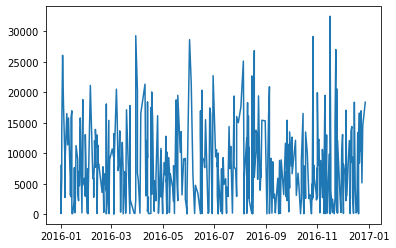

In [41]:
#gráfico da série temporal
plt.plot(ts)

Data
2016-01-01    54216.26
2016-01-04    18402.00
2016-01-05        0.00
2016-01-06    31217.55
2016-01-07        0.00
                ...   
2016-12-22    14058.80
2016-12-23    47186.51
2016-12-26        0.00
2016-12-27        0.00
2016-12-28    18402.00
Freq: B, Name: Total, Length: 259, dtype: float64

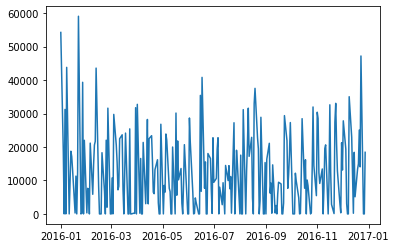

In [50]:
#nova visualização do ano com total por dia do mês
tsa = ts.resample('B').sum()
plt.plot(tsa)
tsa

In [52]:
#visualização do total anual
tsat = ts.resample('A').sum()
tsat

Data
2016-12-31    3054162.73
Freq: A-DEC, Name: Total, dtype: float64

Data
1     350913.03
2     231641.91
3     239162.98
4     248414.58
5     217074.94
6     235983.82
7     213615.43
8     319847.33
9     186892.37
10    202183.73
11    318313.03
12    290119.58
Name: Total, dtype: float64

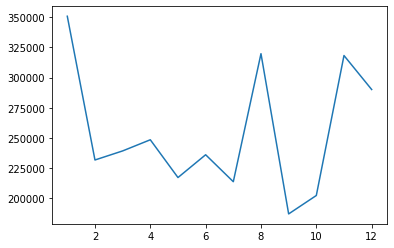

In [53]:
#visualização mensal
tsm = ts.groupby([lambda x: x.month]).sum()
plt.plot(tsm)
tsm

Data
2016-01-01     8053.60
2016-01-01      150.40
2016-01-02     6087.00
2016-01-02    13828.60
2016-01-03    26096.66
                ...   
2016-02-25     2009.40
2016-02-27    15424.04
2016-02-27     7038.77
2016-02-27      127.84
2016-02-28     9007.00
Name: Total, Length: 75, dtype: float64

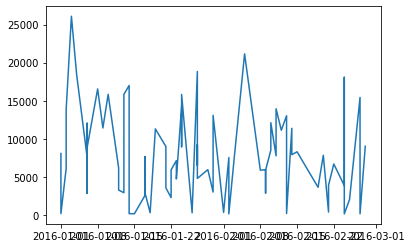

In [55]:
#visualização de um intervalo de tempo específico
tses = ts['2016-01-01' : '2016-02-28']
plt.plot(tses)
tses